In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
#tf.random.set_seed(RANDOM_SEED)

In [0]:
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

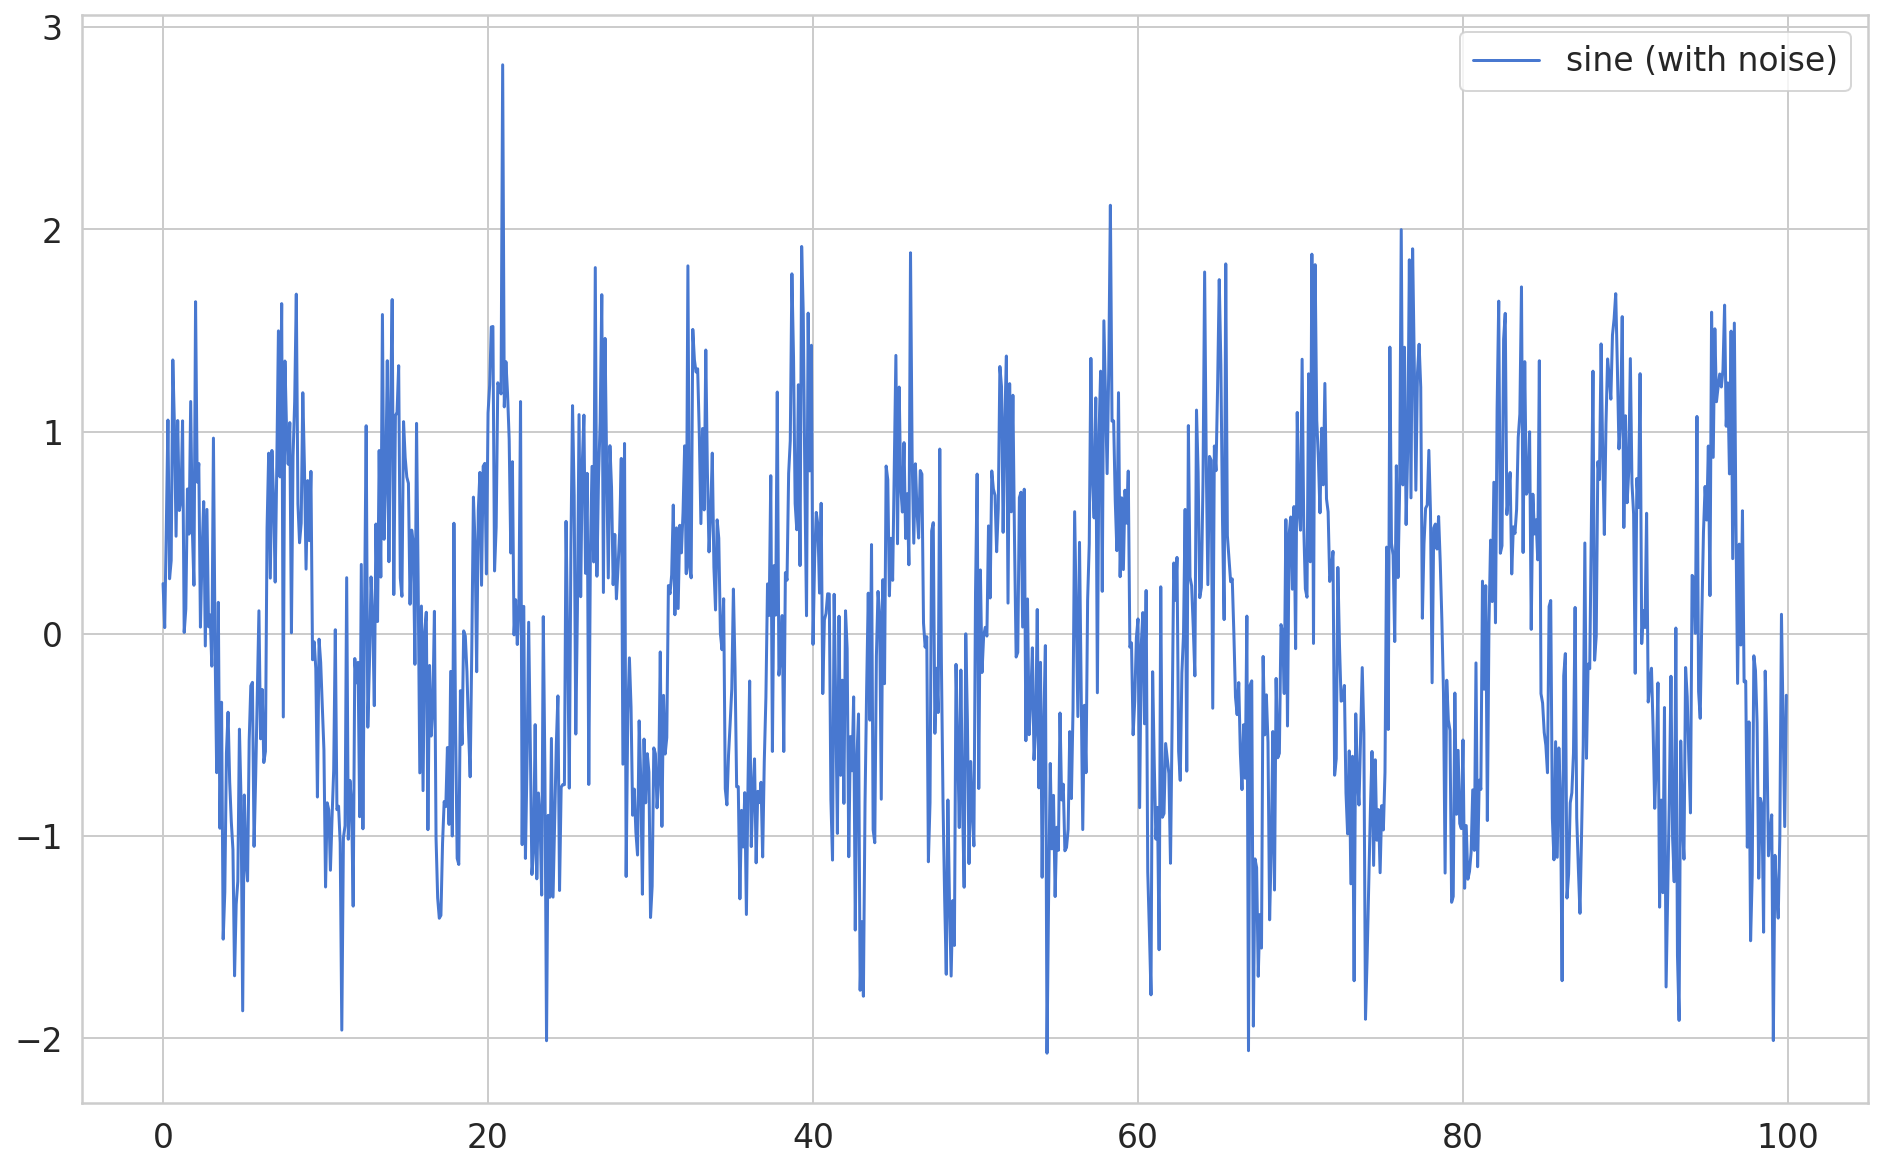

In [17]:
plt.plot(time, sin, label='sine (with noise)');
plt.legend();

# Data Preprocessing

In [18]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
df.head()

,sine
0.0,0.248357
0.1,0.030701
0.2,0.522514
0.3,1.057035
0.4,0.272342


In [19]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [0]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [21]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)

print(X_train.shape, y_train.shape)

(790, 10, 1) (790,)


In [22]:
X_train[:5]

array([[[0.24835708],
        [0.03070127],
        [0.5225136 ],
        [1.05703513],
        [0.27234165],
        [0.36235706],
        [1.35424888],
        [1.02793505],
        [0.4826189 ],
        [1.05460693]],

       [[0.03070127],
        [0.5225136 ],
        [1.05703513],
        [0.27234165],
        [0.36235706],
        [1.35424888],
        [1.02793505],
        [0.4826189 ],
        [1.05460693],
        [0.60976214]],

       [[0.5225136 ],
        [1.05703513],
        [0.27234165],
        [0.36235706],
        [1.35424888],
        [1.02793505],
        [0.4826189 ],
        [1.05460693],
        [0.60976214],
        [0.65834248]],

       [[1.05703513],
        [0.27234165],
        [0.36235706],
        [1.35424888],
        [1.02793505],
        [0.4826189 ],
        [1.05460693],
        [0.60976214],
        [0.65834248],
        [1.05302022]],

       [[0.27234165],
        [0.36235706],
        [1.35424888],
        [1.02793505],
        [0.4826189 ],
  

# Modeling

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

## Training

In [24]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Train on 711 samples, validate on 79 samples
Epoch 1/30
711/711 [==============================] - 2s 2ms/sample - loss: 0.3623 - val_loss: 0.3383
Epoch 2/30
711/711 [==============================] - 1s 1ms/sample - loss: 0.3210 - val_loss: 0.3169
Epoch 3/30
711/711 [==============================] - 1s 1ms/sample - loss: 0.3174 - val_loss: 0.3159
Epoch 4/30
711/711 [==============================] - 1s 1ms/sample - loss: 0.3169 - val_loss: 0.3148
Epoch 5/30
711/711 [==============================] - 1s 1ms/sample - loss: 0.3164 - val_loss: 0.3141
Epoch 6/30
711/711 [==============================] - 1s 1ms/sample - loss: 0.3160 - val_loss: 0.3134
Epoch 7/30
711/711 [==============================] - 1s 1ms/sample - loss: 0.3156 - val_loss: 0.3127
Epoch 8/30
711/711 [==============================] - 1s 1ms/sample - loss: 0.3152 - val_loss: 0.3120
Epoch 9/30
711/711 [==============================] - 1s 1ms/sample - loss: 0.3147 - val_loss: 0.3112
Epoch 10/30
711/711 [================

## Evaluation

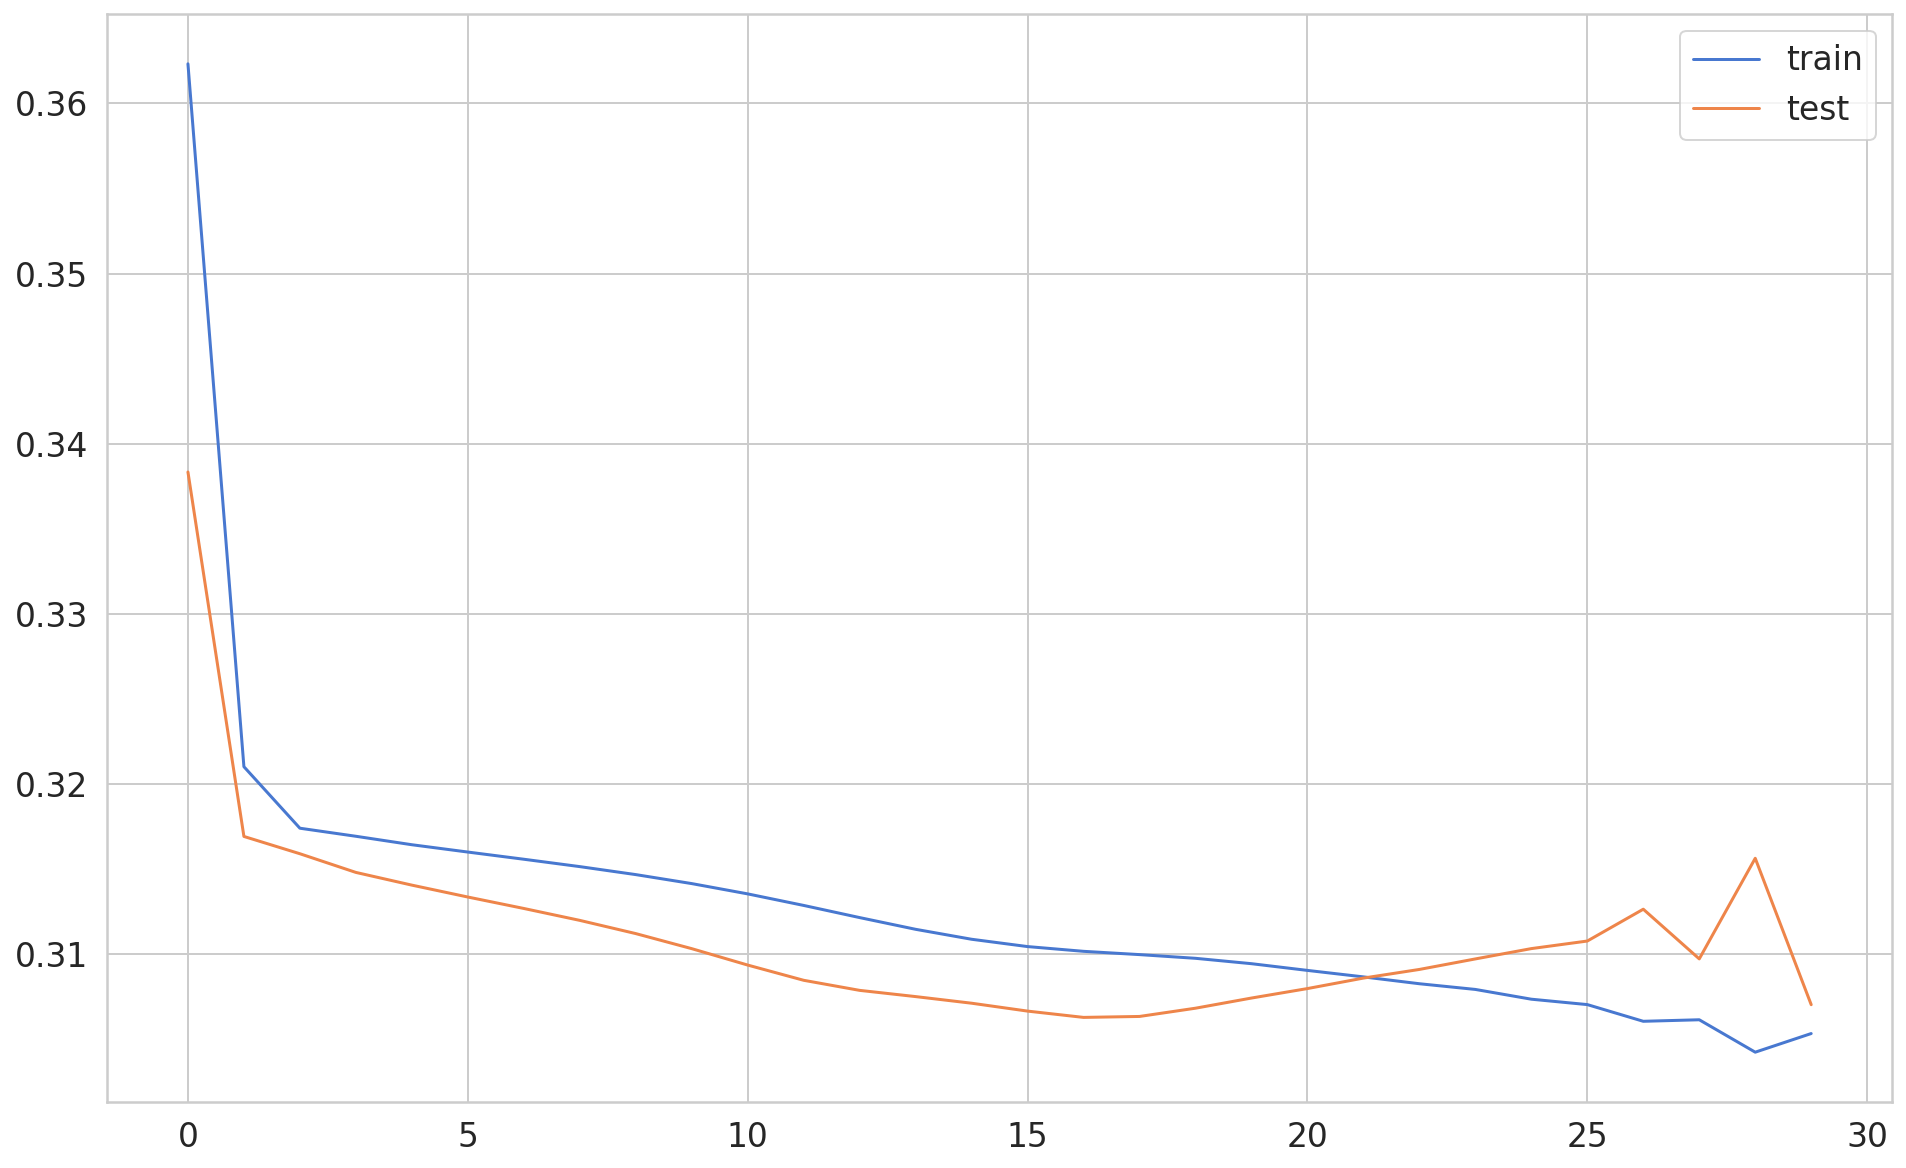

In [25]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [0]:
y_pred = model.predict(X_test)

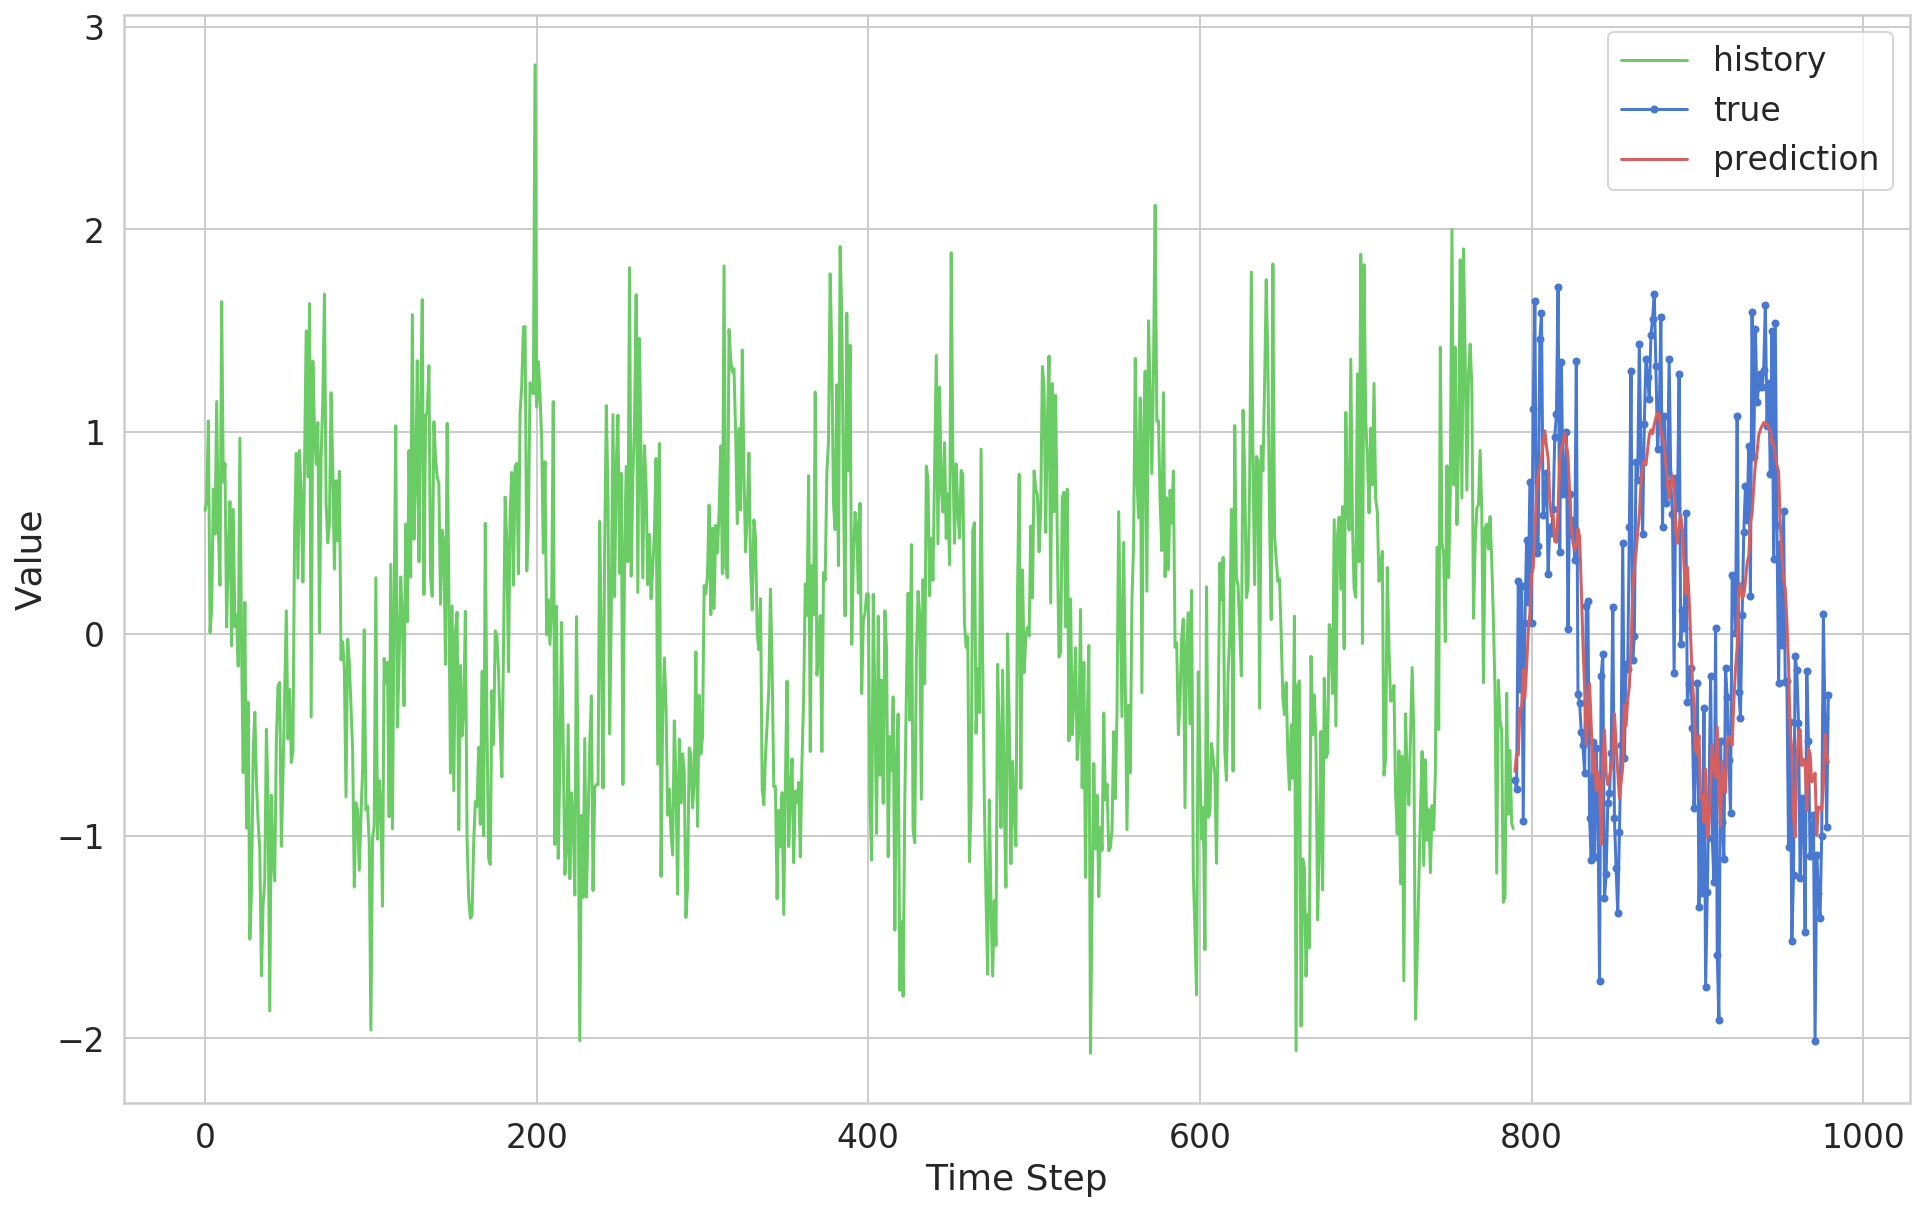

In [27]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

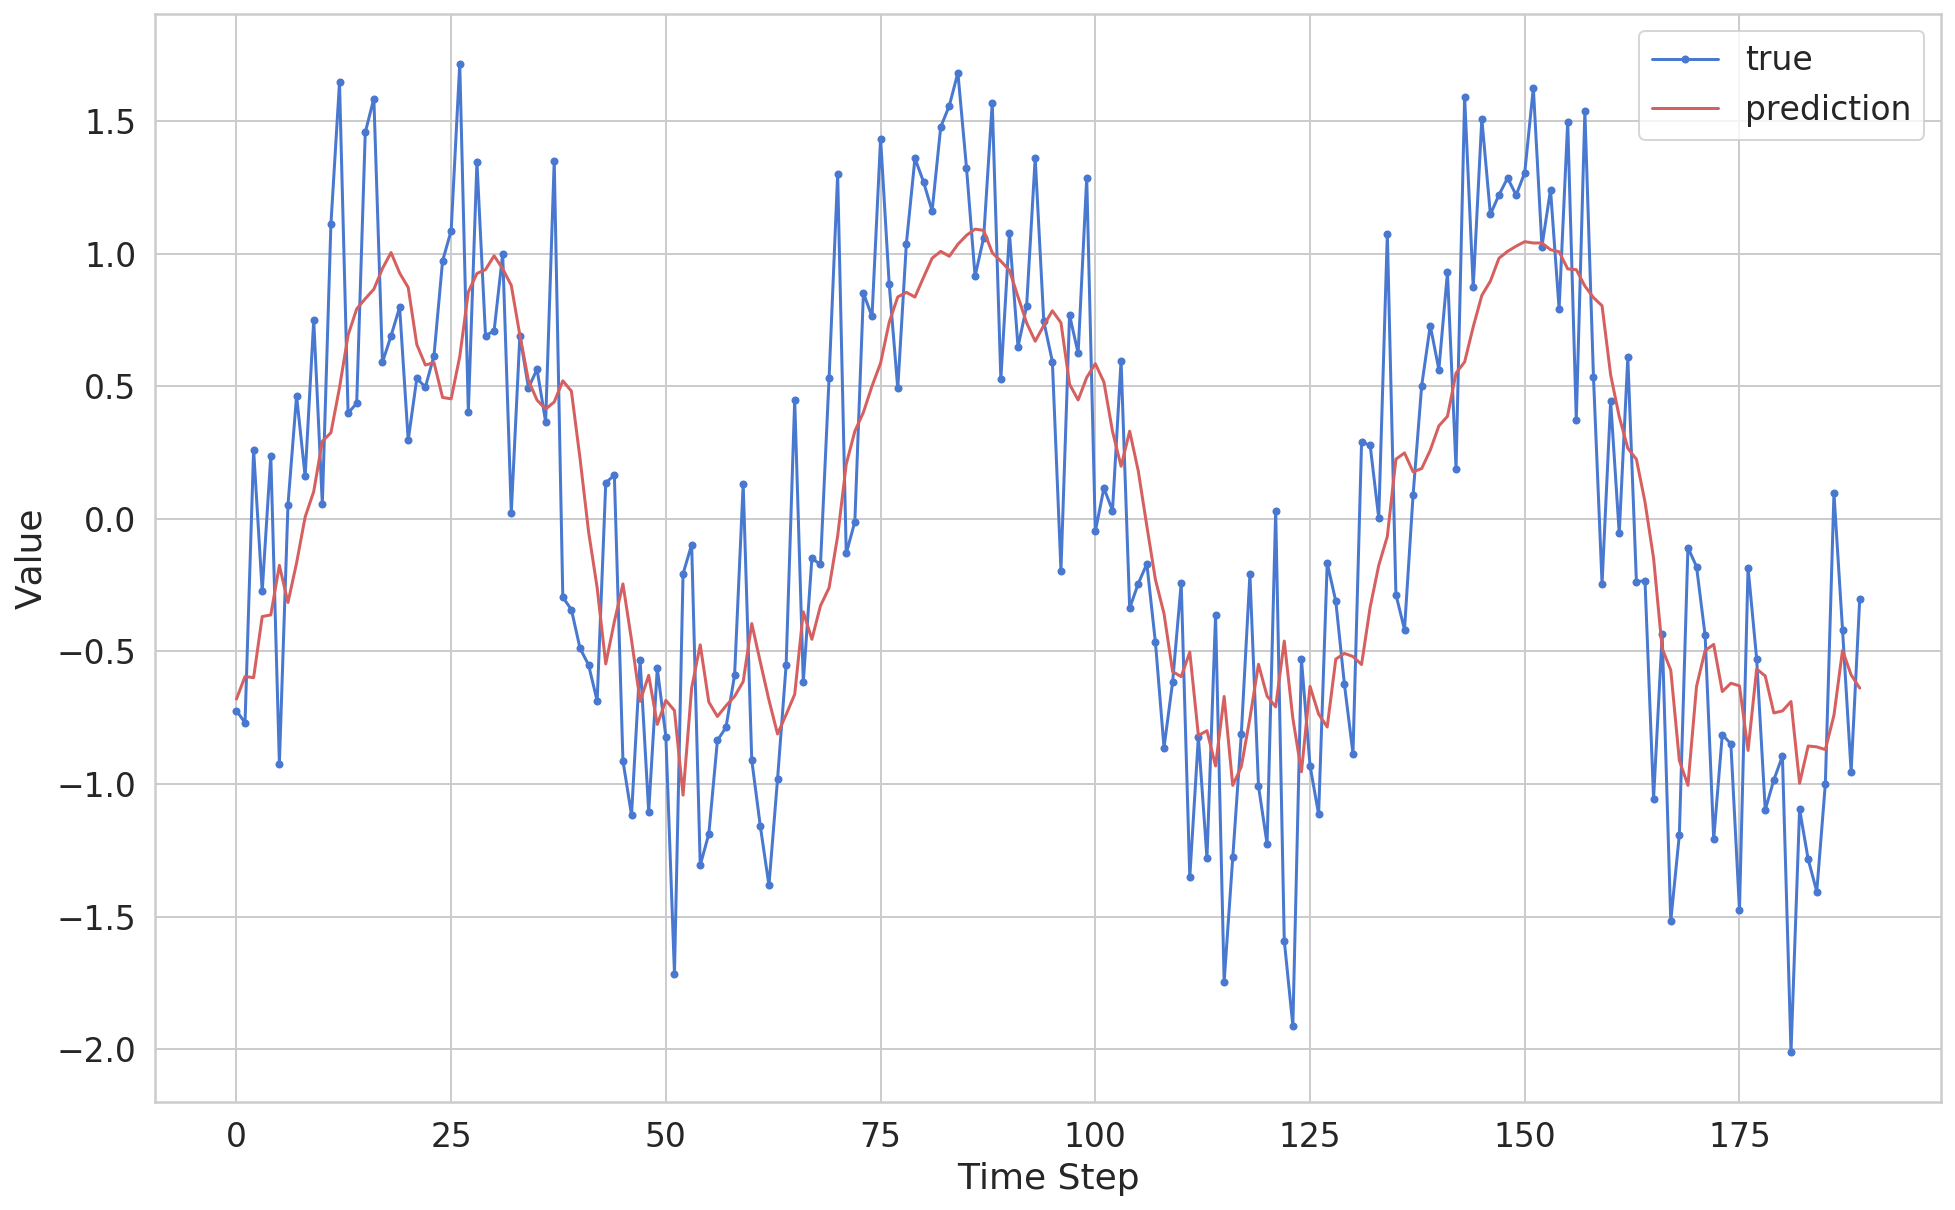

In [28]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();